Related issues:
- https://github.com/pytorch/vision/issues/2950 
- https://tcapelle.github.io/capeblog/pytorch/fastai/2021/02/26/image_resizing.html

In [1]:
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
from PIL import Image

pil_img = Image.open("../data/test.png")
pil_img = pil_img.convert("RGB")

(906, 438)

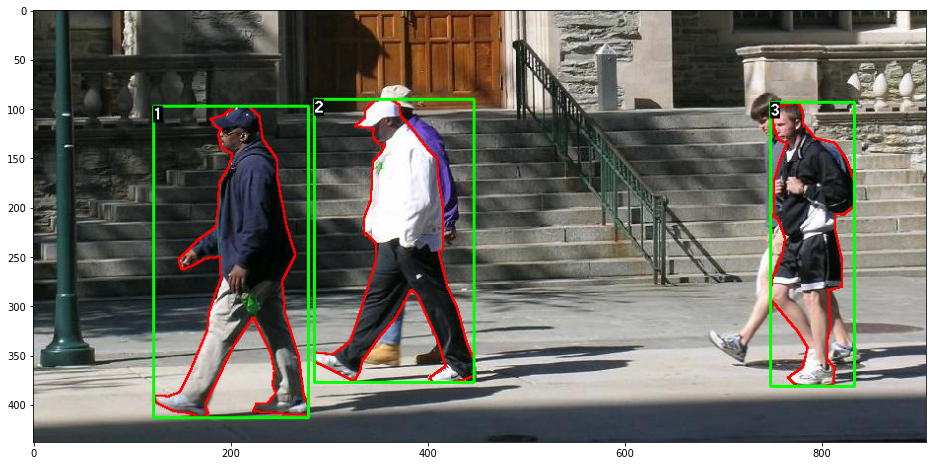

In [4]:
plt.figure(figsize=(16, 10))
plt.imshow(pil_img)
pil_img.size

In [5]:
dn_size = (320, 196)

In [6]:
pil_img_dn = pil_img.resize(dn_size, resample=2)

In [7]:
import torch
import numpy as np
print(torch.__version__)

t_img = torch.from_numpy(np.asarray(pil_img).copy().transpose((2, 0, 1)))
print(t_img.shape, t_img.dtype)


t_img_dn = torch.nn.functional.interpolate(t_img[None, ...].float(), size=dn_size[::-1], mode="bilinear")
t_img_dn = t_img_dn[0, ...].byte()
print(t_img_dn.shape, t_img_dn.dtype)

1.8.0
torch.Size([3, 438, 906]) torch.uint8
torch.Size([3, 196, 320]) torch.uint8


/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:3451: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


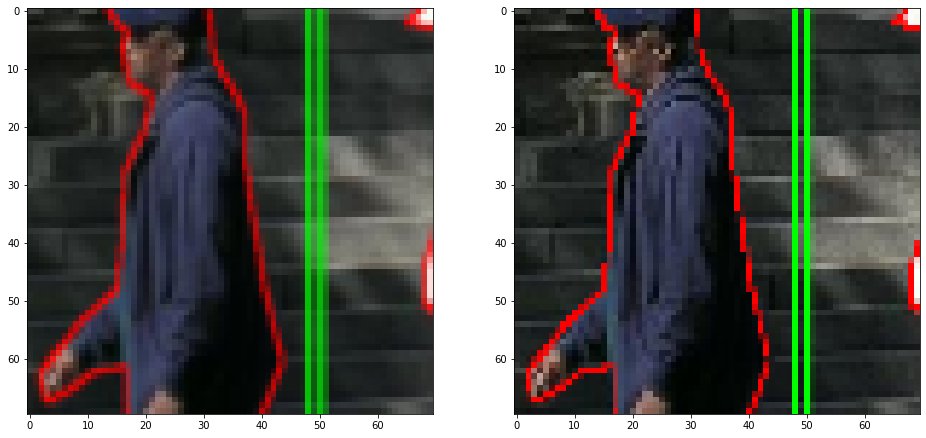

In [8]:
plt.figure(figsize=(16, 10))
plt.subplot(121)
plt.imshow(np.asarray(pil_img_dn)[50:120, 50:120, :], interpolation='none')
plt.subplot(122)
plt.imshow(t_img_dn.permute(1, 2, 0).numpy()[50:120, 50:120, :], interpolation='none')

In [22]:
t_pil_img_dn = torch.from_numpy(np.asarray(pil_img_dn).copy().transpose((2, 0, 1)))

mae = torch.mean(torch.abs(t_pil_img_dn.float() - t_img_dn.float()))
max_abs_err = torch.max(torch.abs(t_pil_img_dn.float() - t_img_dn.float()))
mae, max_abs_err

(tensor(6.3026), tensor(151.))

In [23]:
t_pil_img_dn[:5, :5, 0]

tensor([[55, 49, 43, 50, 46],
        [55, 49, 43, 50, 46],
        [47, 41, 35, 42, 38]], dtype=torch.uint8)

In [24]:
t_img_dn[:5, :5, 0]

tensor([[53, 45, 36, 49, 44],
        [53, 45, 36, 49, 44],
        [45, 37, 28, 41, 36]], dtype=torch.uint8)

Save downscaled image for testings

In [25]:
pil_img_dn.save("../data/test_dn.png")
pil_img_dn.size

(320, 196)

In [26]:
from torchvision.io.image import read_image

In [27]:
t_pil_img_dn = read_image("../data/test_dn.png")
t_pil_img_dn.shape

torch.Size([3, 196, 320])

In [28]:
mae = torch.mean(torch.abs(t_pil_img_dn.float() - t_img_dn.float()))
max_abs_err = torch.max(torch.abs(t_pil_img_dn.float() - t_img_dn.float()))
mae, max_abs_err

(tensor(6.3026), tensor(151.))

### Compare with proto output

In [6]:
import numpy as np

In [7]:
import matplotlib.pylab as plt
%matplotlib inline

In [8]:
from PIL import Image

pil_img = Image.open("../data/test.png")
pil_img = pil_img.convert("RGB")

In [9]:
dn_size = (320, 196)

pil_img_dn = pil_img.resize(dn_size, resample=2)

In [12]:
proto_pil_img = Image.open("../data/proto_aa_interp_lin_s0_output.png")
proto_pil_img = proto_pil_img.convert("RGB")

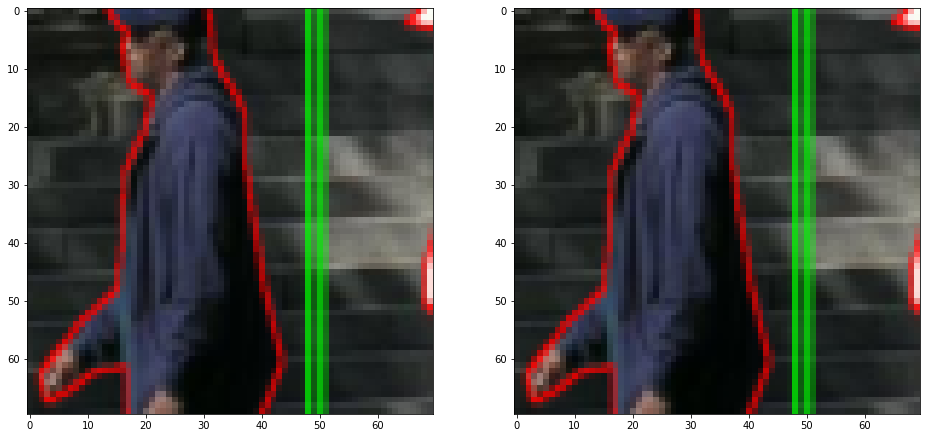

In [13]:
plt.figure(figsize=(16, 10))
plt.subplot(121)
plt.imshow(np.asarray(pil_img_dn)[50:120, 50:120, :], interpolation='none')
plt.subplot(122)
plt.imshow(np.asarray(proto_pil_img)[50:120, 50:120, :], interpolation='none')

In [21]:
abs_diff = np.abs(np.asarray(pil_img_dn).astype("float") - np.asarray(proto_pil_img).astype("float")).max(axis=-1)
abs_diff.shape

(196, 320)

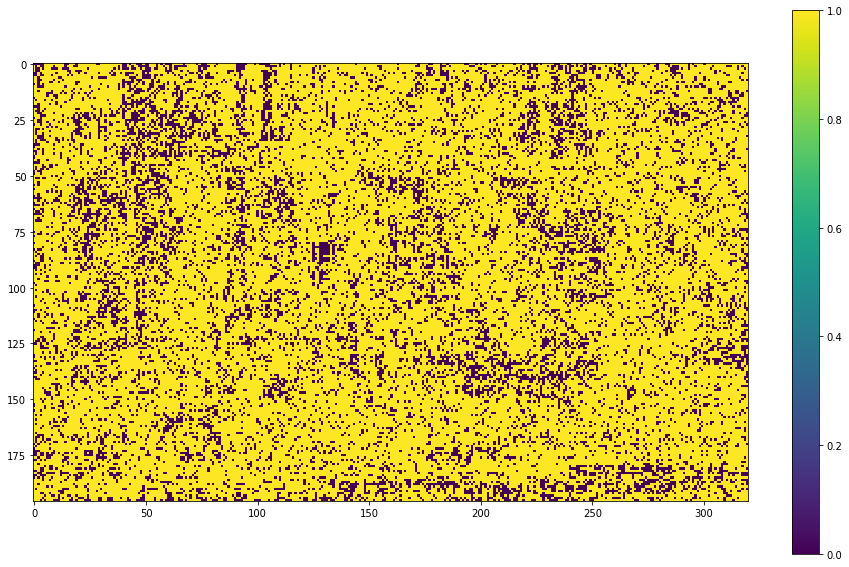

In [22]:
plt.figure(figsize=(16, 10))
plt.imshow(abs_diff, interpolation='none')
plt.colorbar()